In [54]:
### OpenCV 사용법

In [56]:
# 함수, 모듈 준비
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## 1. 개요
# 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
# C, C++, Python 등에서 사용 가능
# 설치: pip install opencv-python

In [4]:
## 2. 이미지 읽어서 살펴보기
# cv2.imread(file_name, flag)
# 이미지를 읽어 Numpy 객체로 만드는 함수
#     1. file_name: 읽고자 하는 이미지 파일
#     2. flag: 이미지를 읽는 방법 설정
#         IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
#         IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
#         IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
#     3. 반환 값: Numpy 객체(행, 열, 색상: 기본 BGR)
# Jupyter Notebook 사용시에는 plt.imread(변수명)
# 파이참에서는                cv2.imshow('Image', 변수명)

In [70]:
image1 = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg', cv2.IMREAD_UNCHANGED)

Text(0.5, 1.0, 'IMREAD_GRAYSCALE')

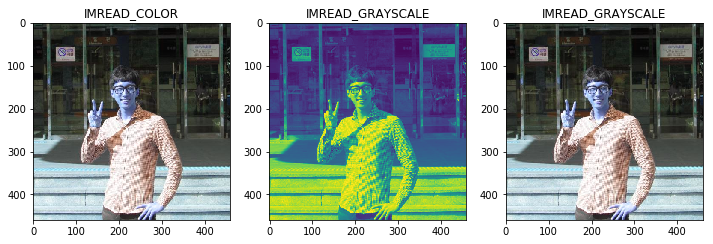

In [71]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.imshow(image1)
plt.title('IMREAD_COLOR')

plt.subplot(132)
plt.imshow(image2)
plt.title('IMREAD_GRAYSCALE')

plt.subplot(133)
plt.imshow(image3)
plt.title('IMREAD_GRAYSCALE')

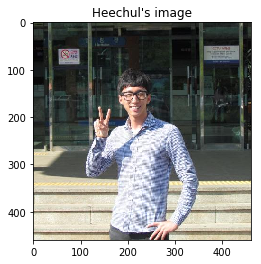

In [72]:
heechul = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.title('Heechul\'s image')
plt.imshow(heechul)

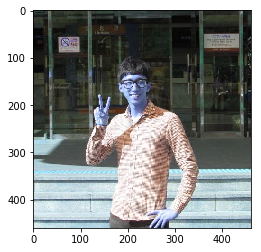

In [75]:
b, g, r = cv2.split(image1)   # img파일을 b,g,r로 분리
plt.imshow(image1)

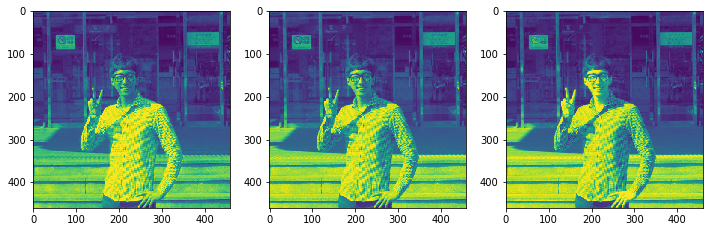

In [76]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.imshow(b)

plt.subplot(132)
plt.imshow(g)

plt.subplot(133)
plt.imshow(r)

In [79]:
hee1 = cv2.merge([b,g,r])   # b, r을 바꿔서 Merge
hee2 = cv2.merge([g,r,b])
hee3 = cv2.merge([r,b,g])

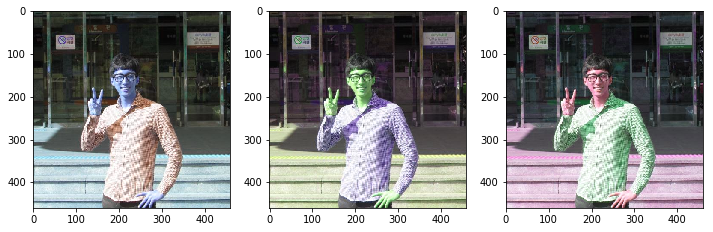

In [80]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.imshow(hee1)

plt.subplot(132)
plt.imshow(hee2)

plt.subplot(133)
plt.imshow(hee3)

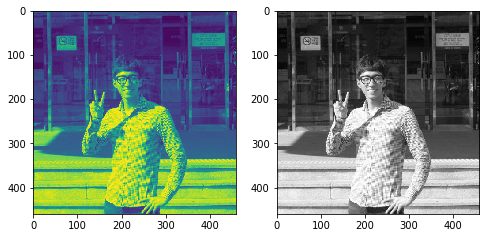

In [81]:
# Gray 스케일 이미지
grayImage = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.imshow(grayImage)

plt.subplot(122)
plt.imshow(grayImage, cmap = plt.get_cmap('gray'))

In [ ]:
## 3. OpenCV 이미지 연산
# 픽셀수 및 이미지 크기 확인

In [82]:
image = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg')
print(image.shape)
print(image.size)

(460, 460, 3)
634800


In [ ]:
## 4. OpenCV 이미지 변형
# 이미지 크기 조절
# cv2.resize(image, dsize, fx, fy, interpolation)
#     dsize: Manual Size
#     fx: 가로 비율
#     fy: 세로 비율
#     interpolation: 보간법
#         INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
#         INTER_AREA: 사이즈를 작게 할 때 주로 사용

In [83]:
image = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg')
print(image.shape)
print(image.size)

(460, 460, 3)
634800


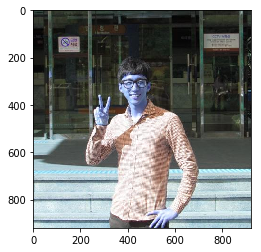

In [87]:
expand = cv2.resize(image, None,
                    fx = 2.0,                         # 가로비율
                    fy = 2.0,                         # 세로비율
                    interpolation = cv2.INTER_CUBIC)  # 사이즈를 크게할 때 주로 사용
# cv2.imshow('Image', expand)
plt.imshow(expand)                                    # 주피터에서

In [88]:
print(expand.shape)
print(expand.size)

(920, 920, 3)
2539200


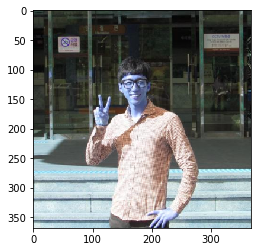

In [89]:
shrink = cv2.resize(image, None,
                    fx=0.8,
                    fy=0.8,
                    interpolation=cv2.INTER_AREA)     # 사이즈를 작게 할 때 주로 사용
# cv2.imshow('Image', shrink)
plt.imshow(shrink)                                  # 주피터에서

In [90]:
print(shrink.shape)
print(shrink.size)

(368, 368, 3)
406272


In [11]:
# 이미지 위치 변경
# cv2.warpAffine(image, M, dsize)
# M: 변환 행렬
# dsize: Manual Size
# 변환 행렬
#     𝑀11 𝑀12 𝑀13
#     𝑀21 𝑀22 𝑀23
# 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
#     (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
# 단순 이미지 위치 변경
#     1 0 x위치
#     0 1 y위치

In [91]:
image = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg')
height, width = image.shape[:2]                  # 행과 열 정보만 저장
print(height), print(width)

460
460


(None, None)

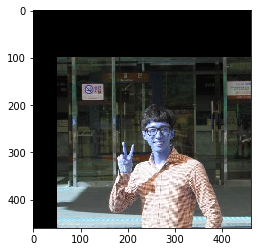

In [94]:
M = np.float32([[1, 0, 50], [0, 1, 100]])         # x 축으로 50, y 축으로 100 이동
dst = cv2.warpAffine(image, M, (width, height))   #
# cv2.imshow('Image', dst)
plt.imshow(dst)                                   # 주피터에서

In [18]:
# 이미지 회전
# cv2.getRotationMatrix2D(center, angle, scale)
#     center: 회전 중심
#     angle: 회전 각도
#     scale: Scale Factor
# 회전 변환을 위한 기본적인 행렬
#     𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
#     𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃

460
460


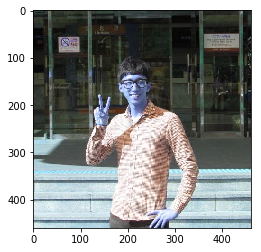

In [95]:
image = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg')
height, width = image.shape[:2]                  # 행과 열 정보만 저장
print(height), print(width)
plt.imshow(image)

In [100]:
M = cv2.getRotationMatrix2D((width / 2, height / 2),   # center
                            angle = 180,               # angle: 180
                            scale = 0.5)               # scale: 0.5

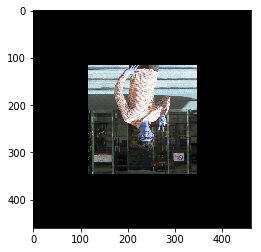

In [101]:
dst = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst)

In [36]:
## 5. OpenCV 이미지 합치기
# 이미지 합치기
#     cv2.add(): Saturation 연산 수행. 0 보다 작으면 0, 255 보다 크면 255 로 표현
#     np.add(): Modulo 연산 수행. 256은 0, 257 은 1 로 표현

In [44]:
image1 = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/heechul.jpg')
image2 = cv2.imread('D:/HeechulFromGithub/Mxnet/OpenCV/data/snowman.png')

In [43]:
result = cv2.add(image1, image2)
result = cv2.cvtColor(result)
plt.imshow(result)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:663: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
